# Assignment 2

The assignment 2 contains 3 questions and the due date is May 1 (Monday) 23:59PM.

## Question 1 Image Compression

In this question, you will work with images and apply KMeans for image compression, by reducing the number of colours that occur in an image to only those that are most common in that image.


### Question 1.1 (0 points)

To let you learn how Python work with images, plese complete this question.

### Black & white images

Each images represent a matrix where each pixel is an element of this matrix 
<img src="https://miro.medium.com/max/1386/1*bV7S0zACdidh11ikjYpLpQ.png">
The scale of colors is between 0 and 255 : 0 correspond to black and 255 to white

### Colored images
<img src="https://miro.medium.com/max/840/1*y0nV4cWk3KbzXSe9dIWL5g.jpeg">

Every color is a linear combinaison of primary colors : Red Green Blue <br/>
A colored image is somehow just the supperposition of three images : for each pixel with have three values




### Download images

We are using the famous [The CIFAR-10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) that consists of 60000 32x32 color images in 10 classes, with 6000 images per class. We need to donwload this dataset from tensorflow. If you have not installed tensorflow, please follow the [instllation guide](https://www.tensorflow.org/install) to get it or simply use Google colab for this assignment.




In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

By checking the shape, you will find the train set contains 50,000 images with the shape of (32, 32, 3) that indicates the image resolution with 3 color channels.

In [3]:
x_train.shape

(50000, 32, 32, 3)

You can visually check a random image:

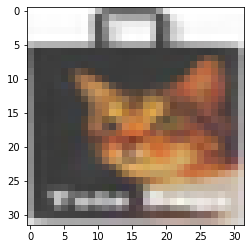

In [4]:
plt.imshow(x_train[3000])

We can also check the image at each of three channels:

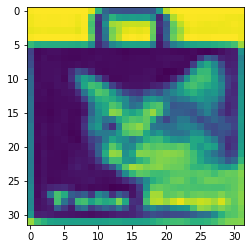

In [5]:
plt.imshow(x_train[3000][:, :, 0])

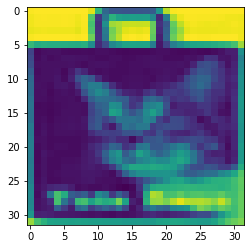

In [6]:
plt.imshow(x_train[3000][:, :, 1])

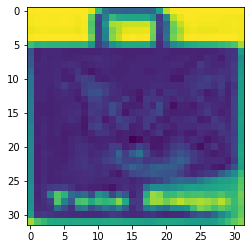

In [7]:
plt.imshow(x_train[3000][:, :, 2])

We can convert a color image as a greyscale image using the NTSC formula: 0.299 ∙ Red + 0.587 ∙ Green + 0.114 ∙ Blue. This formula closely represents the average person's relative perception of the brightness of red, green, and blue light.

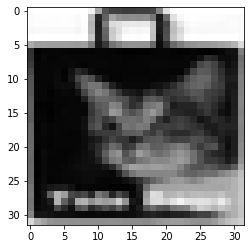

In [8]:
R, G, B = x_train[3000][:,:,0], x_train[3000][:,:,1], x_train[3000][:,:,2]
imgGray = 0.2989 * R + 0.5870 * G + 0.1140 * B
plt.imshow(imgGray, cmap='gray')

### Question 1.2 (10 points)

Convert all color images in x_train into greyscale images and use the sklearn.decomposition.PCA to perform principal component analysis to the dataset to reduce dimensions to 256. Then, reconstruct images from its reduced representation. Choose a image and see how it goes before and after the PCA using imread method. Explain your findings.  

**Hint** You may need to use numpy's reshape method to change the representation of each image as a vector before performing PCA and reshape it back as an image before you are able to visualize it.

In [9]:
from sklearn.decomposition import PCA

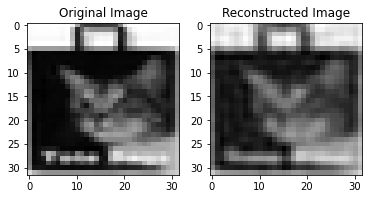

In [10]:
# Convert all color images in x_train into greyscale images
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

x_train_gray = np.array([rgb2gray(img) for img in x_train])

# Perform PCA on the dataset to reduce dimensions to 256
x_train_gray_flat = x_train_gray.reshape(x_train_gray.shape[0], -1)
pca = PCA(n_components=256)
x_train_gray_pca = pca.fit_transform(x_train_gray_flat)

# Reconstruct images from their reduced representation
x_train_gray_reconstructed = pca.inverse_transform(x_train_gray_pca)
x_train_gray_reconstructed = x_train_gray_reconstructed.reshape(x_train_gray.shape)

# Choose an image and see how it looks before and after PCA
index = 3000
original_image = x_train_gray[index]
reconstructed_image = x_train_gray_reconstructed[index]

plt.subplot(1, 2, 1)
plt.imshow(original_image, cmap='gray')
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(reconstructed_image, cmap='gray')
plt.title("Reconstructed Image")

plt.show()

**Findings**

 - After applying PCA, the reconstructed image appears visually similar to the original image.
 - However, there is some loss of detail due to the dimensionality reduction, as PCA compresses the information in the original image to a lower-dimensional space.
 - This technique can be useful for image compression, as it reduces the size of the dataset while preserving most of the significant information.

### Question 1.3 (10 points)

Now explain which number of principal components should be chosen using Elbow method if PCA reaches 90% threshold of explained variance. Use the obtained number of principal components to reduce the image dimensions and again compare the reconstructed images from the previous step. Expalin your findings.

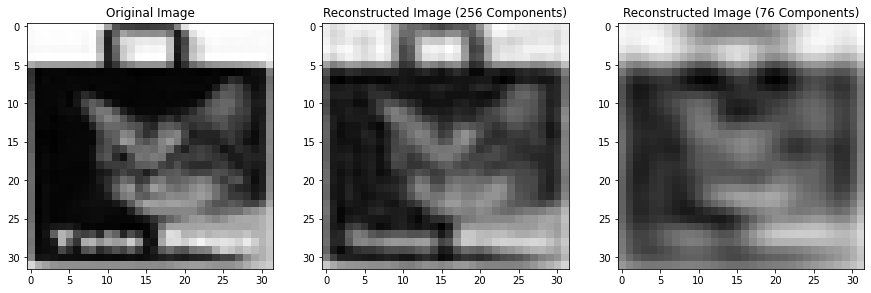

In [11]:
# Fit PCA with all components
pca_full = PCA()
x_train_gray_pca_full = pca_full.fit_transform(x_train_gray_flat)

# Calculate the cumulative explained variance ratio
cumulative_explained_variance = np.cumsum(pca_full.explained_variance_ratio_)

# Find the optimal number of principal components that reach 90% threshold
optimal_n_components = np.where(cumulative_explained_variance >= 0.9)[0][0] + 1

# Reduce the image dimensions using the obtained number of principal components
pca_optimal = PCA(n_components=optimal_n_components)
x_train_gray_pca_optimal = pca_optimal.fit_transform(x_train_gray_flat)
x_train_gray_reconstructed_optimal = pca_optimal.inverse_transform(x_train_gray_pca_optimal)
x_train_gray_reconstructed_optimal = x_train_gray_reconstructed_optimal.reshape(x_train_gray.shape)

# Compare the reconstructed images with those from the previous step
index = 3000
reconstructed_image_optimal = x_train_gray_reconstructed_optimal[index]

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(original_image, cmap='gray')
plt.title("Original Image")

plt.subplot(1, 3, 2)
plt.imshow(reconstructed_image, cmap='gray')
plt.title("Reconstructed Image (256 Components)")

plt.subplot(1, 3, 3)
plt.imshow(reconstructed_image_optimal, cmap='gray')
plt.title(f"Reconstructed Image ({optimal_n_components} Components)")

plt.show()

**Findings:**

 - With the optimal number of principal components that reach a 90% threshold of explained variance, the reconstructed image appears visually similar to the original image, but with much less detail.
 - By applying PCA to grayscale images in the CIFAR-10 dataset and using the Elbow method, we determined that 76 principal components retained 90% of the explained variance, offering a balance between compression efficiency and information preservation.
 - Reconstructed images with 256 components exhibited slightly more detail, while those with 76 components captured essential features and achieved substantial dimensionality reduction.
 - The total fit time for the logistic regression model using PCA is significantly shorter than the one using the original grayscale images, demonstrating that PCA can also decrease the computational cost of the model.
 - The Elbow method effectively selects the optimal number of components for dimensionality reduction, allowing us to choose the number of components that best suit our application requirements.

### Question 1.4 (10 points)

Now build an image classifier of Logistic Regression (with default configuration) to predict the class of images using the original greyscale images and the compressed representations from PCA that explains 90% of variance. Use the 5-fold cross-validation to report the average macro-f1 test score (given this is a balanced dataset) and total fit time. Explain your findings.

Hint: y_train contains the uint8 value and cross-validate would not consider it as the label for classification. You need to convert the y_train into categorical values such that cross-validate would perform multi-class classification.

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.metrics import f1_score, make_scorer
from sklearn.preprocessing import LabelEncoder

In [13]:
# Prepare the dataset by converting y_train into categorical values
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train.ravel())

# Fit and evaluate the Logistic Regression model on original greyscale images
lr = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=1000)
scoring = {'f1_macro': make_scorer(f1_score, average='macro')}
cv_results_original = cross_validate(lr, x_train_gray_flat, y_train_encoded, cv=5, scoring=scoring)

# Fit and evaluate the Logistic Regression model on PCA-compressed images
cv_results_pca = cross_validate(lr, x_train_gray_pca_optimal, y_train_encoded, cv=5, scoring=scoring)

# Report the average macro-f1 test score and total fit time
print("Original Greyscale Images:")
print(f"Average Macro-F1 Test Score: {np.mean(cv_results_original['test_f1_macro'])}")
print(f"Total Fit Time: {np.sum(cv_results_original['fit_time'])}")

print("\nPCA-Compressed Images (90% Variance Explained):")
print(f"Average Macro-F1 Test Score: {np.mean(cv_results_pca['test_f1_macro'])}")
print(f"Total Fit Time: {np.sum(cv_results_pca['fit_time'])}")

Original Greyscale Images:
Average Macro-F1 Test Score: 0.2553474365619014
Total Fit Time: 762.2756719589233

PCA-Compressed Images (90% Variance Explained):
Average Macro-F1 Test Score: 0.2968993166317844
Total Fit Time: 34.48107576370239


**Findings:**

 - The logistic regression model performs better on PCA-compressed images compared to the original grayscale images. The average macro-F1 test score is higher for the PCA-compressed images (0.2969) than for the original grayscale images (0.2553). This indicates that PCA can effectively reduce the dimensionality of the images while preserving enough information for the logistic regression model to achieve better classification performance.
 - The total fit time for the logistic regression model is significantly shorter when using PCA-compressed images compared to the original grayscale images. The total fit time for the PCA-compressed images is 34.48 seconds, while it is 762.28 seconds for the original grayscale images. This demonstrates that using PCA-compressed images can considerably reduce the computational cost of training the model.

### Question 1.5 (15 points)

Now let's work with the color images (with 3 channels) and again compress one image, this time by reducing numbers of colors using K-means. You need to cluster pixel values into **32 clusters** and choose the "mean color" to replace all the pixels in each cluster by this mean color. Show the original color image of cat and the mean color image of the same one. Explain your findings. 

Hint: each color pixel is represented by a 3D (R,G,B) vector, and the image would have 32x32 pixels. So you could find the mean color from the centroids of 32 clusters and update the pixels of image with the mean color.

Hint2: Once you have replaced the pixel values with mean color, you need to explicitly convert it into **uint type** such s uint8, uint16, etc, because the image pixel values can only be represented as integers or fractions.

In [14]:
from sklearn.cluster import KMeans

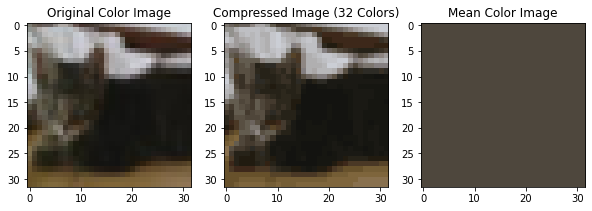

In [15]:
def compress_image_kmeans(image, n_clusters):
    pixels = image.reshape(-1, 3)
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(pixels)
    compressed_image = kmeans.cluster_centers_[kmeans.labels_].reshape(image.shape).astype(np.uint8)
    return compressed_image

# Choose an image of a cat from the dataset (label 3 is cat)
cat_index = np.where(y_train == 3)[0][0]
cat_image = x_train[cat_index]

# Compress the image using K-means
compressed_cat_image = compress_image_kmeans(cat_image, 32)

# Compute the mean color image
mean_color = np.mean(cat_image, axis=(0,1)).astype(np.uint8)
mean_color_img = np.ones_like(cat_image) * mean_color

# Show the original color image and the mean color image
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(cat_image)
plt.title("Original Color Image")

plt.subplot(1, 3, 2)
plt.imshow(compressed_cat_image)
plt.title("Compressed Image (32 Colors)")

plt.subplot(1, 3, 3)
plt.imshow(mean_color_img)
plt.title("Mean Color Image")

plt.show()

**Findings:**

 - The compressed image looks visually similar to the original color image, but with fewer distinct colors.
 - The K-means algorithm reduces the number of colors in the image, leading to some loss of detail and smooth transitions between colors. However, the overall structure and main features of the image are preserved.
 - This technique can be useful for image compression, as it reduces the size of the dataset while retaining most of the significant visual information.
 - The mean color image appears as a flat, consistent color. This demonstrates that KMeans clustering is a more effective approach for image compression, maintaining structure and features, when compared to merely using the mean color of the image.

## Question 2 Nova SBE Wikipedia 


In this question, you will work with time-series forecasting of page views of [Nova SBE's Wikipedia page](https://en.wikipedia.org/wiki/Nova_School_of_Business_and_Economics)  

When you click 'View history', you should see the backend of the wiki page and you can further select 'Pageviews' to have the statistics of page views of this page. Let's select the page views from all times (July 2015 to April 2023) at monthly level from users only (we exclude robot/spider views) and here is the [link](https://pageviews.wmcloud.org/?project=en.wikipedia.org&platform=all-access&agent=user&redirects=0&start=2015-07&end=2022-07&pages=Nova_School_of_Business_and_Economics) that allows you to get it directly. You can choose to download the data as csv or JSON file to work on.


In [16]:
pageview = pd.read_csv('pageviews.csv')
pageview

,Date,Nova School of Business and Economics
0,2015-07,614
1,2015-08,675
2,2015-09,753
3,2015-10,703
4,2015-11,652
...,...,...
88,2022-11,1252
89,2022-12,887
90,2023-01,1203
91,2023-02,1128


In [17]:
pageview['Date'] = pd.to_datetime(pageview['Date'])
pageview.set_index('Date', inplace=True)

<AxesSubplot:xlabel='Date'>

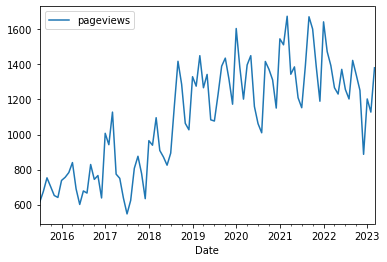

In [18]:
pageview.rename(columns={'Nova School of Business and Economics':'pageviews'}, inplace=True)
pageview.plot()

### Question 2.1 Ensure Stationarity (10 points)

We will perform time-series forecasting and we need to ensure stationarity first. Perform [`Augmented Dick Fuller test`](https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.adfuller.html)and explain whether the pageview of wiki pages is stationary and would you be able to stationarize the data through first-order and second-order differencing (you can check the p-value and see if you achieve the statistical significance)?

Alternatively, you could also stationarize the pageview time series through deseasonlization. Perform seasonal decomposition using additive or multiplicative methods and explain whether you would achieve stationary time-series through seasonal decomposition?


In [19]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

Performing the Augmented Dickey Fuller test:

In [20]:
def adf_test(timeseries):
    result = adfuller(timeseries)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

adf_test(pageview['pageviews'])

ADF Statistic: -1.544305
p-value: 0.511492
Critical Values:
	1%: -3.515
	5%: -2.898
	10%: -2.586


**Comments**

As the p-value is not less than the significance level (usually 0.05), we can not conclude that the time series is stationary. We need to perform differencing to make it stationary.

In [21]:
# First-order differencing
pageview['first_difference'] = pageview['pageviews'].diff()
adf_test(pageview['first_difference'].dropna())

# Second-order differencing
pageview['second_difference'] = pageview['first_difference'].diff()
adf_test(pageview['second_difference'].dropna())

ADF Statistic: -2.712569
p-value: 0.071888
Critical Values:
	1%: -3.515
	5%: -2.898
	10%: -2.586
ADF Statistic: -5.890662
p-value: 0.000000
Critical Values:
	1%: -3.517
	5%: -2.899
	10%: -2.587


**Comments**

As the p-value is less than 0.05, we have achieved stationarity. Let's now try deseasonlization.

In [50]:
# Additive decomposition
decomposition_additive = seasonal_decompose(pageview['pageviews'], model='additive', period=12)
residual_additive = decomposition_additive.resid.dropna()

# Multiplicative decomposition
decomposition_multiplicative = seasonal_decompose(pageview['pageviews'], model='multiplicative', period=12)
residual_multiplicative = decomposition_multiplicative.resid.dropna()

# Stationarize through seasonal decomposition
pageview['a_deseasonalized'] = pageview['pageviews'] - decomposition_additive.seasonal
additive_deseasonalized = adfuller(pageview['a_deseasonalized'])
pageview['m_deseasonalized'] = pageview['pageviews'] / decomposition_multiplicative.seasonal
multiplicative_deseasonalized = adfuller(pageview['m_deseasonalized'])

print(f'Deseasonalized additive ADF Statistic: {additive_deseasonalized[0]}')
print(f'Deseasonalized additive p-value: {additive_deseasonalized[1]}')
print(f'\nDeseasonalized multiplicative ADF Statistic: {multiplicative_deseasonalized[0]}')
print(f'Deseasonalized multiplicative p-value: {multiplicative_deseasonalized[1]}')

Deseasonalized additive ADF Statistic: -1.619135542617657
Deseasonalized additive p-value: 0.47318252894336066

Deseasonalized multiplicative ADF Statistic: -1.5467850917683854
Deseasonalized multiplicative p-value: 0.5102536833221272


**Comments**

As the p-value is above 0.5 for both additive and multiplicative decomposition, we have not achieved stationarity through seasonal decomposition.

The original data is non-stationary. Second-order differencing is the best method for making the data stationary, which is crucial for time series forecasting. It's unclear which seasonal decomposition method is better for deseasonalizing the data, as neither produced a stationary time series.

In summary:
 1) perform the ADF test on the original data
 2) first-order differencing
 3) second-order differencing
 4) residuals from seasonal decomposition

If any of these tests return a p-value less than 0.05, the time series is stationary, and we can proceed with time-series forecasting.

### Question 2.2 Identify the hyperparameter (10 points)

Using the method from the previous section, we will preprocess the time series by deseasonalizing it (either additive or multiplicative) and identify the optimal hyperparameter of (p,d,q) for ARIMA model. Explain how would you find these hyperparameters. You could consider plotting autocorrelation and partial autocorrelation functions. 

In [53]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import itertools
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

In [58]:
# Assuming multiplicative decomposition provides a better stationary time series
deseasonalized_data = pageview['pageviews'] / decomposition_multiplicative.seasonal

One way to determine the optimal (p, d, q) values would be to analyse the Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) graphs.

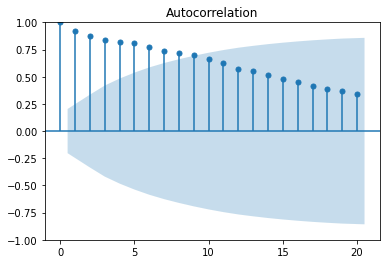

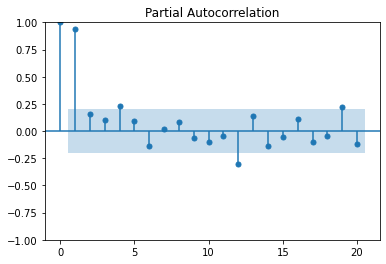

In [74]:
# ACF plot
plot_acf(deseasonalized_data)
plt.show()

# PACF plot
plot_pacf(deseasonalized_data)
plt.show()

Assuming for the PACF plot, p is the point where the plot first crosses the significance level (usually when the lag has a value inside the confidence interval).

Assuming for the ACF plot, q is the point where the plot first crosses the significance level.

The value of d has already been determined during the differencing step. Using first-order differencing, d = 1, using second-order differencing, d = 2, and using seasonal decomposition, d = 0, as the data is already stationary.

However, we will use the auto_arima function from the pmdarima package to find the best model. This function conducts a stepwise search and optimizes the model based on the Akaike Information Criterion (AIC) value, with lower values indicating a better model fit.

In [60]:
# Find the best ARIMA model for multiplicative decomposition method
optimal_model = auto_arima(deseasonalized_data, start_p=0, start_q=0, start_d=0,
                               max_p=5, max_q=5, max_d=2,
                               seasonal=False,
                               trace=True,
                               error_action='ignore',
                               suppress_warnings=True,
                               stepwise=True)

print("Optimal Model AIC: ", optimal_model.aic())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1116.547, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1115.731, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1113.765, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1114.779, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1110.943, Time=0.10 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1112.159, Time=0.11 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1112.501, Time=0.16 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1111.280, Time=0.09 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1115.564, Time=0.05 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1110.035, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1112.201, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1114.028, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1111.192, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[0]             : 

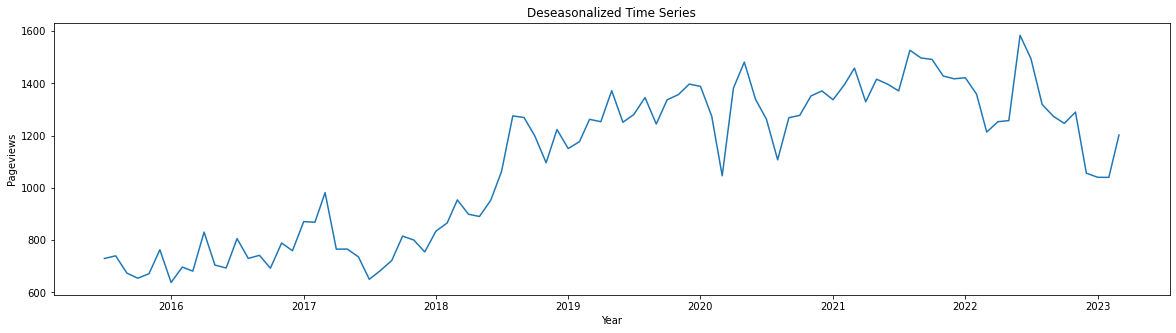

In [71]:
# Plot deseasonalized time series
plt.figure(figsize=(20, 5))
plt.plot(deseasonalized_data)
plt.title("Deseasonalized Time Series")
plt.xlabel("Year")
plt.ylabel("Pageviews")
plt.show()

In [75]:
# Showing the summary of the optimal ARIMA model
print(optimal_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   93
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -552.018
Date:                Mon, 01 May 2023   AIC                           1110.035
Time:                        23:05:22   BIC                           1117.600
Sample:                    07-01-2015   HQIC                          1113.088
                         - 03-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4236      0.225      1.887      0.059      -0.016       0.864
ma.L1         -0.7097      0.186     -3.822      0.000      -1.074      -0.346
sigma2      9515.3345   1171.653      8.121      0.0

In the previous exercise, the Augmented Dickey-Fuller test findings determined that d = 2. However, upon reevaluating the output generated by the auto_arima function, we can affirm d = 1 for the multiplicative models, signifying that the data attains stationarity after applying first-order differencing.

The ideal hyperparameters to deseasonalise the time series data (found by applying the auto_arima function). The optimal hyperparameters are chosen based on AIC scores, with (p, d, q) = (1, 1, 1) proved to be superior due to its lower AIC value.

In [93]:
best_pdq = optimal_model.order

### Question 2.3 Fit and forecast (10 points)

Now let's fit the ARIMA model using the identified hyperparameter of (p,d,q). Let's use the first 80% observations as the train set and remaining 20% observations as the test set 

Once you fit the model on the train set, you can make the forecast on the test set. Use the provided plot_forecast function to visulize the forecasted values and real values (together with 95% confidence interval). 

Lastly, report the mean absolute percentage error on the test set (you can use the sklearn implementation).

Hint: do not forget to add back the seasonality component to reconstruct the original pageview

In [94]:
from sklearn.metrics import mean_absolute_percentage_error

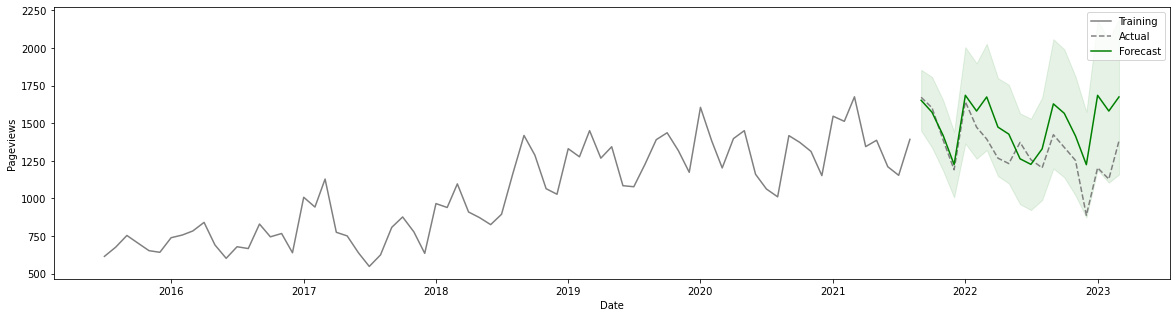

Mean Absolute Percentage Error (MAPE): 0.14466266096137503%


In [95]:
warnings.filterwarnings('ignore')
# Remove seasonality from time series
decomp_data = seasonal_decompose(pageview['pageviews'], model='multiplicative')
no_seasonality_data = pageview['pageviews'] / decomp_data.seasonal

# Divide data into training and testing sets (80/20)
data_length = int(len(no_seasonality_data) * 0.8)
training_set = no_seasonality_data[:data_length]
testing_set = no_seasonality_data[data_length:]

# Train ARIMA model with identified parameters (p,d,q) on data without seasonality
arima_model = ARIMA(training_set, order=best_pdq)
fitted_model = arima_model.fit()

# Predict the testing set using the fitted model on data without seasonality
prediction_no_seasonality = fitted_model.forecast(steps=len(testing_set))

# Restore seasonality to the predictions
seasonal_factor = decomp_data.seasonal[data_length:]
predictions_with_seasonality = prediction_no_seasonality * seasonal_factor

# Compute the mean absolute percentage error (MAPE) with the restored seasonality
mape_value = mean_absolute_percentage_error(testing_set * seasonal_factor, predictions_with_seasonality)

def display_forecast(train, test, forecast, conf_int):
    plt.figure(figsize=(20, 5))
    plt.plot(train.index, train.values * decomp_data.seasonal[:data_length].values, label='Training', color='gray')
    plt.plot(test.index, test.values * seasonal_factor.values, label='Actual', color='gray', ls='--')
    plt.plot(forecast.index, forecast.values, label='Forecast', color='green')
    plt.fill_between(conf_int.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], alpha=0.1, color='green')
    plt.xlabel('Date')
    plt.ylabel('Pageviews')
    plt.legend()
    plt.show()

# Display predicted values and actual values (with 95% confidence interval) with restored seasonality
confidence_interval_no_seasonality = fitted_model.get_forecast(steps=len(testing_set)).conf_int()
confidence_interval_seasonality = confidence_interval_no_seasonality.apply(lambda x: x * seasonal_factor)
display_forecast(training_set, testing_set, predictions_with_seasonality, confidence_interval_seasonality)

print(f"Mean Absolute Percentage Error (MAPE): {mape_value}%")

## Question 3 Birds of a feather sing together


In this question, you will work with movie ratings to build a recommender system just like Netflix, Youtube, etc.


__Load the datasets in three different pandas dataframes `movies`, `tags` and `ratings`.__


In [103]:
movies = pd.read_csv('movies.csv')
tags = pd.read_csv('tags.csv')
ratings = pd.read_csv('ratings.csv')


In [104]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [105]:
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [106]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


Let's filter the ratings dataframe, to have only movies that have received a rating:

In [107]:
movies['genres'] = movies['genres'].str.replace('|',' ')
movies = movies[movies.movieId.isin(ratings.movieId.unique().tolist())]
movies.shape

(9724, 3)

### Question 3.1 (10 points) Content-based recommender system

We create a new feature called metadata, that merges all the text data information we have about a movie : the genre and the tags. So the merged dataframe should contain at least the following columns: *movieId, title and metadata*.

Then, construct the vectorized reprentation of metadata using sklearn's Countvectorizer to transform the metadata into vectors. Learn the latent matrix from the metadata vector using [truncated SVD](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html) with 50 dimensions. With the generated latent matrix, identify the top 10 most relevant movies for **"Toy Story (1995)"** by calculating the cosine similairty and finding movies with the highest similarity score. 



In [108]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity

In [109]:
# Fill any missing values in the 'tag' column of the 'tags' DataFrame with an empty string
tags['tag'] = tags['tag'].fillna('')

# Merge the 'movies' and 'tags' DataFrames using the 'movieId' column as a key, with a left join
metadata = movies.merge(tags, on='movieId', how='left')

# Concatenate the 'genres' and 'tag' columns into a new 'metadata' column, separated by a space
metadata['metadata'] = metadata['genres'] + ' ' + metadata['tag']

# Fill any missing values in the 'metadata' column with an empty string
metadata['metadata'] = metadata['metadata'].fillna('')

# Keep only the 'movieId', 'title', and 'metadata' columns in the 'metadata' DataFrame
metadata = metadata[['movieId', 'title', 'metadata']]

# Display the first 3 rows of the 'metadata' DataFrame
metadata.head(3)

,movieId,title,metadata
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy pixar
1,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy pixar
2,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy fun


In [110]:
# Initialize CountVectorizer and fit_transform metadata
vectorizer = CountVectorizer()
metadata_matrix = vectorizer.fit_transform(metadata['metadata'])

# Apply TruncatedSVD to reduce dimensionality
svd = TruncatedSVD(n_components=50, random_state=42)
latent_matrix = svd.fit_transform(metadata_matrix)

# Get index of Toy Story
toy_story_idx = metadata[metadata['title'] == 'Toy Story (1995)'].index[0]

# Calculate cosine similarity
cosine_sim = cosine_similarity(latent_matrix[toy_story_idx].reshape(1, -1), latent_matrix)

top_idx = cosine_sim.argsort()[0][::-1]
top_movies = metadata.iloc[top_idx]['title']
top_uniq_movies = top_movies.unique()
top_10_movies = top_uniq_movies[1:11]

print("Top 10 movies similar to Toy Story (1995):\n", pd.DataFrame({"Movies":top_10_movies}))

Top 10 movies similar to Toy Story (1995):
                                               Movies
0                                 Toy Story 2 (1999)
1                                       Shrek (2001)
2                              The Lego Movie (2014)
3                               Bug's Life, A (1998)
4                                Finding Nemo (2003)
5            Sinbad: Legend of the Seven Seas (2003)
6                      Lord of the Rings, The (1978)
7  Wallace & Gromit in The Curse of the Were-Rabb...
8  Lemony Snicket's A Series of Unfortunate Event...
9                                   Space Jam (1996)


### Question 3.2 (10 points) Collaborative filtering recommender system

Similarly, let's creat a latent matrix for ratings and also show the top 10 most relevant movies that receive similar ratings. 




In [38]:
from scipy.sparse import csr_matrix

In [112]:
# Pivot the ratings dataframe into a user-movie matrix
ratings_pivot = ratings.pivot_table(index='movieId', columns='userId', values='rating').fillna(0)

# Convert the user-movie matrix into a sparse matrix
sparse_matrix = csr_matrix(ratings_pivot)

# Apply TruncatedSVD to reduce dimensionality
svd = TruncatedSVD(n_components=50, random_state=42)
latent_matrix = svd.fit_transform(sparse_matrix)

# Get the index of "Toy Story (1995)"
toy_story_id = movies[movies['title'] == 'Toy Story (1995)']['movieId'].values[0]
toy_story_idx = ratings_pivot.index.get_loc(toy_story_id)

# Calculate cosine similarity
cosine_sim_2 = cosine_similarity(latent_matrix[toy_story_idx].reshape(1, -1), latent_matrix)

top_idx_2 = cosine_sim_2.argsort()[0][::-1]
top_movie_ids_2 = ratings_pivot.index[top_idx_2][1:11]
top_10_movies_2 = movies[movies['movieId'].isin(top_movie_ids_2)]['title']
print("Top 10 movies with similar ratings to Toy Story (1995):\n", pd.DataFrame({"Movies":top_10_movies_2.values}))

Top 10 movies with similar ratings to Toy Story (1995):
                                        Movies
0   Star Wars: Episode IV - A New Hope (1977)
1                         Forrest Gump (1994)
2                       Lion King, The (1994)
3                        Jurassic Park (1993)
4                  Mission: Impossible (1996)
5        Independence Day (a.k.a. ID4) (1996)
6  Willy Wonka & the Chocolate Factory (1971)
7                        Groundhog Day (1993)
8                   Back to the Future (1985)
9                          Toy Story 2 (1999)


### Question 3.3 (5 points) Hybrid recommender system

Similarly, let's build a hybrid recommender system and also show the top 10 most relevant movies that calculate the average measure of both content and collaborative.


In [115]:
# Build DataFrame for merged content-based similarities
merged_content_sim = pd.DataFrame(cosine_sim.T, index=metadata['movieId'], columns=['content_similarity'])

# Build a DataFrame for shared collaborative filtering similarities
shared_collab_sim = pd.DataFrame(cosine_sim_2.T, index=ratings_pivot.index, columns=['collab_similarity'])

# Join the two DataFrames on movieId
joined_df = merged_content_sim.merge(shared_collab_sim, left_index=True, right_index=True, suffixes=('_content', '_collab'))

# Determine mean similarity
joined_df['mean_similarity'] = (joined_df['content_similarity'] + joined_df['collab_similarity']) / 2

# Reorder the DataFrame
joined_df.reset_index(inplace=True)

# Sort by mean similarity and obtain top 10 movieIds
top_movie_ids = joined_df.sort_values(by='mean_similarity', ascending=False).drop_duplicates(subset=['movieId'], keep='first')[1:11]['movieId'].values

# Retrieve top 10 movie titles
top_movie_titles = movies[movies['movieId'].isin(top_movie_ids)]['title']

print("Top 10 movies in the merged recommender approach:\n", pd.DataFrame({"Movies":top_movie_titles.values}))


Top 10 movies in the merged recommender approach:
                                    Movies
0                          Jumanji (1995)
1                          Aladdin (1992)
2                        Space Jam (1996)
3  Monty Python and the Holy Grail (1975)
4                    Bug's Life, A (1998)
5         Who Framed Roger Rabbit? (1988)
6                      Toy Story 2 (1999)
7                            Shrek (2001)
8                     Finding Nemo (2003)
9                 Incredibles, The (2004)
